<img src="Decision Tree.png" width=1000 height=500>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
set_df = df[df.Species == 'Iris-setosa'].drop('Id',axis=1)
set_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
ver_df = df[df.Species == 'Iris-versicolor'].drop('Id',axis=1)
ver_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [9]:
vir_df = df[df.Species == 'Iris-virginica'].drop('Id',axis=1)
vir_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


### Visualising data

#### Boxplot

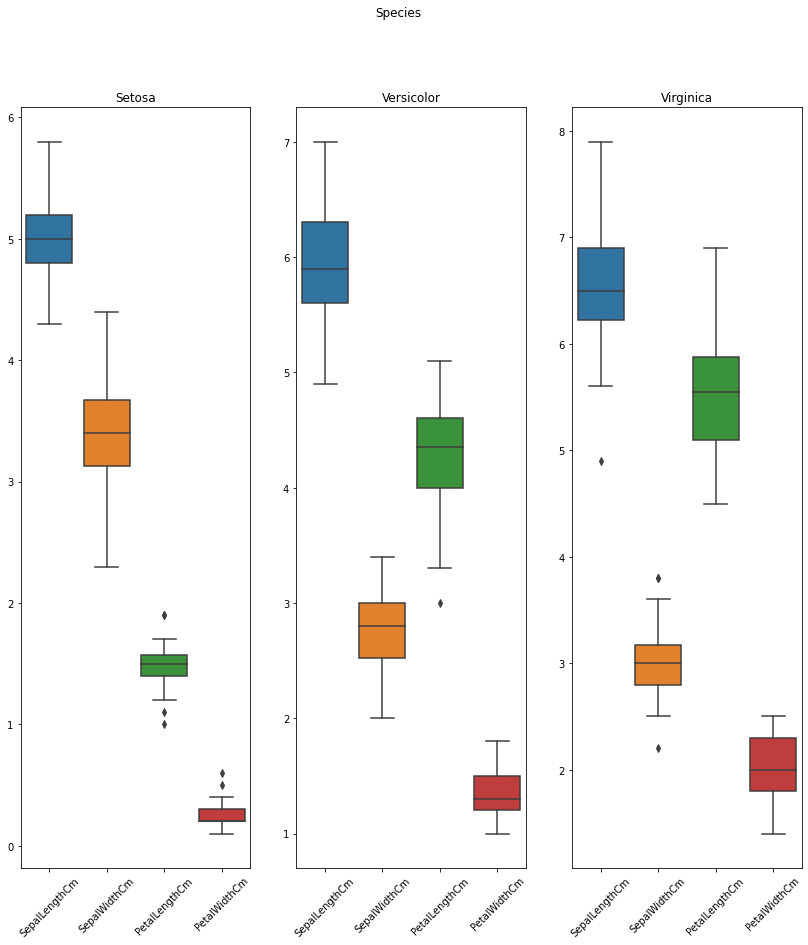

In [10]:
figure,ax = plt.subplots(1,3,figsize=(14,14))
plt.suptitle('Species')

#'Iris-setosa'
sns.boxplot(ax=ax[0],data=set_df)
ax[0].set_title('Setosa')

#'Iris-versicolor'
sns.boxplot(ax=ax[1],data=ver_df)
ax[1].set_title('Versicolor')

#'Iris-virginica'
sns.boxplot(ax=ax[2],data=vir_df)
ax[2].set_title('Virginica')

for ax in ax.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

#### Jointplot

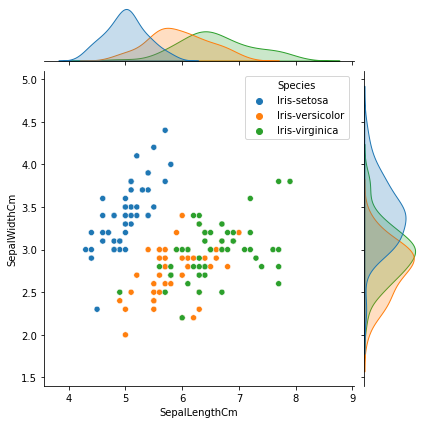

In [11]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, hue=df.Species);

#### Violinplot

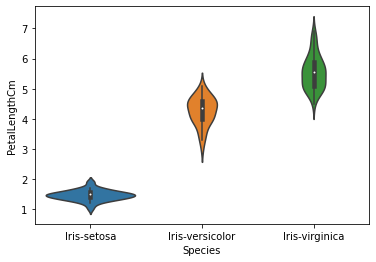

In [12]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df);

#### Pairplot

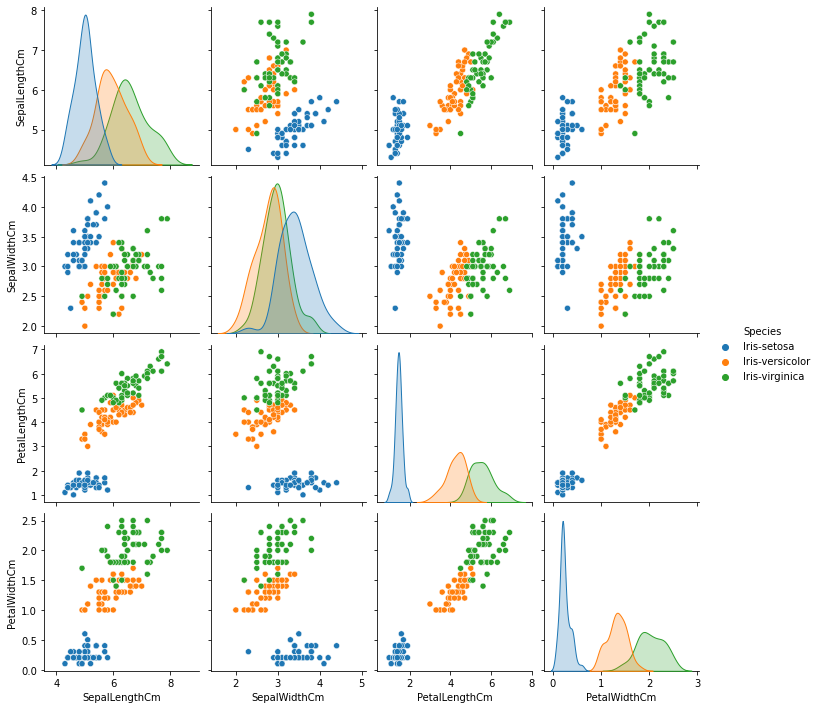

In [13]:
sns.pairplot(df.drop('Id',axis=1),hue='Species');

### Selecting Dependent And Independent Variables

In [14]:
X = df.drop('Species',axis=1)

In [15]:
y = df.Species.values

### Splitting Dataset Into Train And Test Datasets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Using Decision Tree For Classification

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=6)

In [43]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=6)

### Prediction

In [44]:
y_pred = clf.predict(X_test)

In [45]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

### Tree Visualization

In [46]:
from sklearn import tree

In [47]:
print(tree.export_text(clf))

|--- feature_0 <= 100.50
|   |--- feature_0 <= 50.50
|   |   |--- class: Iris-setosa
|   |--- feature_0 >  50.50
|   |   |--- class: Iris-versicolor
|--- feature_0 >  100.50
|   |--- class: Iris-virginica



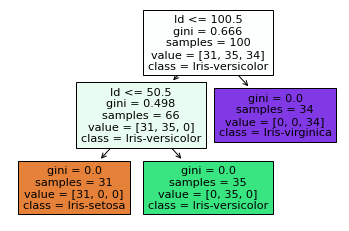

In [48]:
tree.plot_tree(clf, feature_names=df.columns, class_names=df.Species.unique(), filled=True);

### Accuracy

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
print('\n')

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



